# Mô hình XBeach

PT động lượng:

$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = - g \frac{\partial \eta}{\partial x} + \frac{\tau_{wx}}{\rho h} - \frac{\tau_{bx}}{\rho h} + fv + \frac{F_x}{\rho h} + \nu_H \nabla^2 u $$

$$ \underbrace{\frac{\partial v}{\partial t}}_{\text{quán tính}} + \underbrace{u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}}_{\text{chuyển tải}} = \underbrace{- g \frac{\partial \eta}{\partial y}}_{\text{trọng lực}} + \underbrace{\frac{\tau_{wy}}{\rho h} - \frac{\tau_{by}}{\rho h}}_{\text{ứng suất}} - \underbrace{fu}_{\text{Coriolis}} + \underbrace{\frac{F_y}{\rho h}}_{\text{sóng}} + \underbrace{\nu_H \nabla^2 v}_{\text{nhớt rối}} $$

PT liên tục:
$$ \frac{\partial \eta}{\partial t} + \frac{\partial (hu)}{\partial x} + v \frac{\partial (hv)}{\partial y} = 0 $$

In [3]:
Nx = 50
Ny = 100
zb = zeros(Nx,Ny) - 10
Δx = 50
Δy = 100
Δt = 1.0
CFL = 0.8  # phải < 1

C = 50
ρ = 1025
g = 9.81
νH = 1.0   # hệ số nhớt rối phương ngang (m^2/s)

1.0

Tích phân thời gian được thực hiện theo sơ đồ hiện:
$$ \frac{\partial u}{\partial t} = \frac{u_{e}^{n+1} - u_{e}^n}{\Delta t} $$

Thành phần chuyển tải được xác định như sau (tất cả đại lượng đều ở bước thời gian $n$):
* vận tốc tiếp tuyến với mặt CV độ sâu được nội suy: $ v_e = \frac{1}{4}(v_n + v_s + v_{j+1,k-} + v_{j+1,k+}) $
* gradient vận tốc được xác định bằng quy tắc ngược dòng: 
$$ \frac{\partial u_e}{\partial x} = \begin{cases} \frac{u_{e} - u_{w}}{\Delta x} & , u_e > 0  \\ \frac{u_{Ee} - u_{e}}{\Delta x} & , u_e < 0 \end{cases} $$
    Các kí hiệu vị trí: 
    * Ee để chỉ vị trí ($j+3/2, k$) (mặt e của CV E).
    * EE để chỉ vị trí ($j+2, k$) (tâm CV kề bên phải của E).
    
* vận tốc chuyển tải "hiệu quả" tại tâm mặt CV được lấy bằng trung bình trọng số vận tốc tại đó và vận tốc "ngược dòng": 
$$ v_e^* = \begin{cases} \frac{1}{2} (k_e u_e + k_w u_w) & , u_e > 0  \\ \frac{1}{2} (k_{Ee} u_{Ee} + k_e u_e) & , u_e < 0 \end{cases} $$
* các trọng số $k$ được xác định như sau: 
$$ k_w = \frac{h_w}{\overline{h_w}}, \qquad  k_e = \frac{h_e}{\overline{h_e}}, \qquad  k_{Ee} = \frac{h_{Ee}}{\overline{h_{Ee}}}$$ 
(độ sâu nước phục vụ tính cân bằng khối lượng chia cho độ sâu nước cân bằng động lượng):
    * độ sâu nước cân bằng động lượng (tính trung bình):
    $$ h_w = \frac{1}{2}(h_W + h_P) \qquad h_e = \frac{1}{2}(h_P + h_E) \qquad h_{Ee} = \frac{1}{2}(h_E + h_{EE}) $$
    * độ sâu nước cân bằng khối lượng (tính ngược dòng):
    $$ h_e^* = \begin{cases} h_P & , u_e > u_\text{min}  \\ h_E & , u_e < -u_\text{min} \\ \max(\eta_P - \eta_E) - \max(z_{b,P} - z_{b,E}) & , |u_e| < u_\text{min} \end{cases} $$


Bỏ qua ứng suất do gió.
`
Số hạng ứng suất do ma sát:
$$ \frac{\tau_{\text{b}x}}{\rho h_e} = c_f \frac{u_e}{h_e} \sqrt{1.16 u_\text{rms}^2 + u_e^2 + v_e^2 } $$
$$ \frac{\tau_{\text{b}y}}{\rho h_n} = c_f \frac{u_n}{h_n} \sqrt{1.16 u_\text{rms}^2 + u_n^2 + v_n^2 } $$

Bỏ qua ảnh hưởng của sóng, vận tốc căn quân phương quỹ đạo sóng $u_\text{rms} = 0$.

Sau cùng, cuối mỗi bước tính, PT liên tục được xấp xỉ như sau:

$$ \frac{\eta_P^{n+1} - \eta_P^n}{\Delta t} = - \frac{u_e^{n+1} h_e^n - u_w^{n+1} h_w^n}{\Delta x} - \frac{v_n^{n+1} h_n^n - v_s^{n+1} h_s^n}{\Delta y} $$ 

In [12]:
# Các tham số 
Ch = 65   # số Chézy 
ρ = 1025
eps = 0.1
g = 9.81
hmin = 0.001
umin = 0.1
CFL = 0.4
zs0 = 0
v0 = 1.0
Nx = 100
Ny = 100
Δx = 20
Δy = 50
X = zeros(Nx, Ny)
Y = zeros(Nx, Ny)
zb = zeros(Nx, Ny) - 2

Fx = zeros(Nx, Ny)
Fy = zeros(Nx, Ny)



1.0

In [9]:
# assume that we know u, v

uu = -1.5 + 0.1*rand(M+1,N) 
vv = 0.5 + 0.2*rand(M,N+1) 
x = zeros(M,N)
y = zeros(M,N)
for i = 1:M
    for j = 1:N
        x[i,j] = (i-1)*Δx
        y[i,j] = (j-1)*Δy
    end
end
# CONSIDER to use a meaningful representation of water surface elevation
η = zeros(M,N) - 0.5*rand(M,N)

hu = zeros(M+1,N)
hv = zeros(M,N+1)

# Solve the continuity equation 
NT = 20
ETA = zeros(M,N,NT)
for i = 1:NT
    h = η - zb

    hu[2:end-1,:] = 0.5(h[1:end-1,:] + h[2:end,:])
    hv[:,2:end-1] = 0.5(h[:,1:end-1] + h[:,2:end])

    # volume fluxes in x and y directions
    qx = uu .* hu
    qy = vv .* hv

    η1 = η - Δt * (-(qx[2:end,:] - qx[1:end-1,:])/Δx - (qy[:,2:end] - qy[:,1:end-1])/Δy )
    # η = η1
    ETA[:,:,NT] = η1
end
# ETA[:,:,NT]

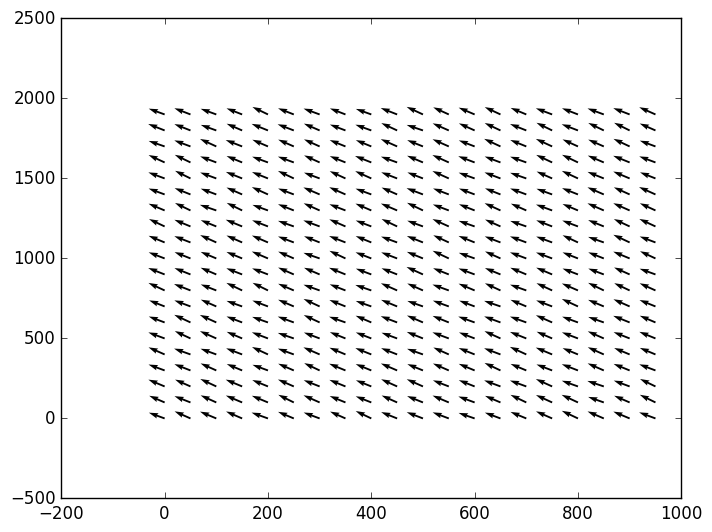

PyObject <matplotlib.quiver.Quiver object at 0x329b05f10>

In [16]:
using PyPlot
# pcolor(ETA[:,:,NT])
# quiver(x,y,uu[1:M,1:N]*1000, vv[1:M,1:N]*1000)
quiver(x[1:20,1:20],y[1:20,1:20],uu[1:20,1:20]*1000, vv[1:20,1:20]*1000)
# pcolor(x,y,sqrt(uu[1:M,1:N].^2 + vv[1:M,1:N].^2))

In [ ]:
using PyPlot

In [ ]:
pcolor(η); colorbar(); quiver(uu[1:M,:], vv[:,1:N])
# Alternatively, we can use interpolation for the color plot to appear smoother
# imshow(η); colorbar();

In [ ]:
# The time step can be calculated with CFL criterion
for i = 1:10
    Δt = minimum(CFL * Δx ./ (sqrt(g*h) + uu[1:end-1,:]))
    println(Δt)
    # the remaining part of code is similar 
end

### Inclusion of motion due to water surface slope

Gravity acceleration due to water surface slope is very important in shallow flows and must be accounted in computation. For that reason we extend the code by including terms like `Δηx` and `Δηy` as gradients of the water surface elevation. 

In [ ]:
# assume that we know u, v

uu = -0.5 + 0.1*rand(M+1,N) 
vv = 1.0 + 0.2*rand(M,N+1) 

# CONSIDER to use a meaningful representation of water surface elevation
η = zeros(M,N) - 0.2*rand(M,N)

uu1 = zeros(M+1,N)
vv1 = zeros(M,N+1)

Δηx = zeros(M,N)
Δηy = zeros(M,N)

hu = zeros(M+1,N)
hv = zeros(M,N+1)

for i = 1:1
    
    Δηx[1:end-1,:] = (η[2:end,:] - η[1:end-1,:])/Δx
    Δηy[:,1:end-1] = (η[:,2:end] - η[:,1:end-1])/Δy
    
    h = η - zb

    hu[2:end-1,:] = 0.5(h[1:end-1,:] + h[2:end,:])
    hv[:,2:end-1] = 0.5(h[:,1:end-1] + h[:,2:end])

    # Solve the momentum equation 
    uu1[1:end-1,:] = uu[1:end-1,:] - Δt * (0 - g * Δηx)
    vv1[:,1:end-1] = vv[:,1:end-1] - Δt * (0 - g * Δηy)
    
    # volume fluxes in x and y directions
    qx = uu1 .* hu
    qy = vv1 .* hv

    # Solve the continuity equation 
    η1 = η - Δt * (-(qx[2:end,:] - qx[1:end-1,:])/Δx - (qy[:,2:end] - qy[:,1:end-1])/Δy )
    η = η1
end

pcolor(η1); colorbar();

It is apparent that the water surface is very rough: after several time steps the lowest point on water surface barely reaches the bottom. So we must be very careful and use good techniques to avoid oscillation in simulation. The following technique is employed in [XBeach model](http://oss.deltares.nl/web/xbeach/) accounting for upwind discretization; that means a modification of `hu` and `hv` should be made.

In [ ]:
# assume that we know u, v

uu = -0.5 + 0.1*rand(M+1,N) 
vv = 1.0 + 0.2*rand(M,N+1) 

# CONSIDER to use a meaningful representation of water surface elevation
η = zeros(M,N) - 0.2*rand(M,N)

uu1 = zeros(M+1,N)
vv1 = zeros(M,N+1)

Δηx = zeros(M,N)
Δηy = zeros(M,N)

hu = zeros(M+1,N)
hv = zeros(M,N+1)

for i = 1:1
    
    Δηx[1:end-1,:] = (η[2:end,:] - η[1:end-1,:])/Δx
    Δηy[:,1:end-1] = (η[:,2:end] - η[:,1:end-1])/Δy
    
    h = η - zb

    hu[2:end-1,:] = 0.5(h[1:end-1,:] + h[2:end,:])
    hv[:,2:end-1] = 0.5(h[:,1:end-1] + h[:,2:end])

    # Solve the momentum equation 
    uu1[1:end-1,:] = uu[1:end-1,:] - Δt * (0 - g * Δηx)
    vv1[:,1:end-1] = vv[:,1:end-1] - Δt * (0 - g * Δηy)
    
    # volume fluxes in x and y directions
    qx = uu1 .* hu
    qy = vv1 .* hv

    # Solve the continuity equation 
    η1 = η - Δt * (-(qx[2:end,:] - qx[1:end-1,:])/Δx - (qy[:,2:end] - qy[:,1:end-1])/Δy )
    η = η1
end

pcolor(η1); colorbar();